# Badanie zależności termodynamicznych gazu idealnego

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Wprowadzenie danych

In [2]:
df_czesc_1 = pd.read_csv('33-c-pierwsza.csv', sep=';', header=0, decimal=',')
df_czesc_2 = pd.read_csv('33-c-druga.csv', sep=';', header=0, decimal=',')

data_array_1 = df_czesc_1.to_numpy()
data_array_2 = df_czesc_2.to_numpy()

# Separate columns for part 1
t_1 = data_array_1[1:, 0]  # [s]
T_1 = data_array_1[1:, 1]  # [Celsius]
P_1 = data_array_1[1:, 2]  # [kPa]

# Separate columns for part 2
V_2_1 = pd.to_numeric(df_czesc_2.iloc[:, 0], errors='coerce').astype(float).values
P_2_1 = pd.to_numeric(df_czesc_2.iloc[:, 2], errors='coerce').astype(float).values
V_2_2 = pd.to_numeric(df_czesc_2.iloc[:, 1], errors='coerce').astype(float).values
P_2_2 = pd.to_numeric(df_czesc_2.iloc[:, 3], errors='coerce').astype(float).values
print(V_2_1)
print(P_2_1)
print(V_2_2)
print(P_2_2)

[60. 58. 56. 54. 52. 50. 48. 46. 44. 42. 40. 38. 36. 34. 32. 30.]
[ 98.7 102.  105.2 109.2 112.4 116.4 121.  125.5 130.4 136.2 141.8 148.
 155.6 162.3 171.1 183.8]
[60. 58. 56. 54. 52. 50. 48. 46. 44. 42. 40. 38. 36. 34. 32. 30.]
[ 97.2 100.3 103.6 106.4 110.9 115.1 119.7 123.9 128.7 134.5 140.2 146.1
 153.9 161.4 170.5 179.4]


## Obliczenia

In [3]:
V_2_1_rec = 1/V_2_1  # [1/ml]
V_2_2_rec = 1/V_2_2  # [1/ml]

# Regresja liniowa dla części drugiej
wspolczynniki_2_1 = np.polyfit(V_2_1_rec, P_2_1, 1)
prosta_regresji_2_1 = np.poly1d(wspolczynniki_2_1)

wspolczynniki_2_2 = np.polyfit(V_2_2_rec, P_2_2, 1)
prosta_regresji_2_2 = np.poly1d(wspolczynniki_2_2)

print(f"Regresja liniowa dla Serii 1: p={wspolczynniki_2_1[0]:.4f}*(1/V) + {wspolczynniki_2_1[1]:.4f}")
print(f"Regresja liniowa dla Serii 2: p={wspolczynniki_2_2[0]:.4f}*(1/V) + {wspolczynniki_2_2[1]:.4f}")

Regresja liniowa dla Serii 1: p=5003.1798*(1/V) + 16.2410
Regresja liniowa dla Serii 2: p=4968.8881*(1/V) + 15.3002


## Wizualizacja danych

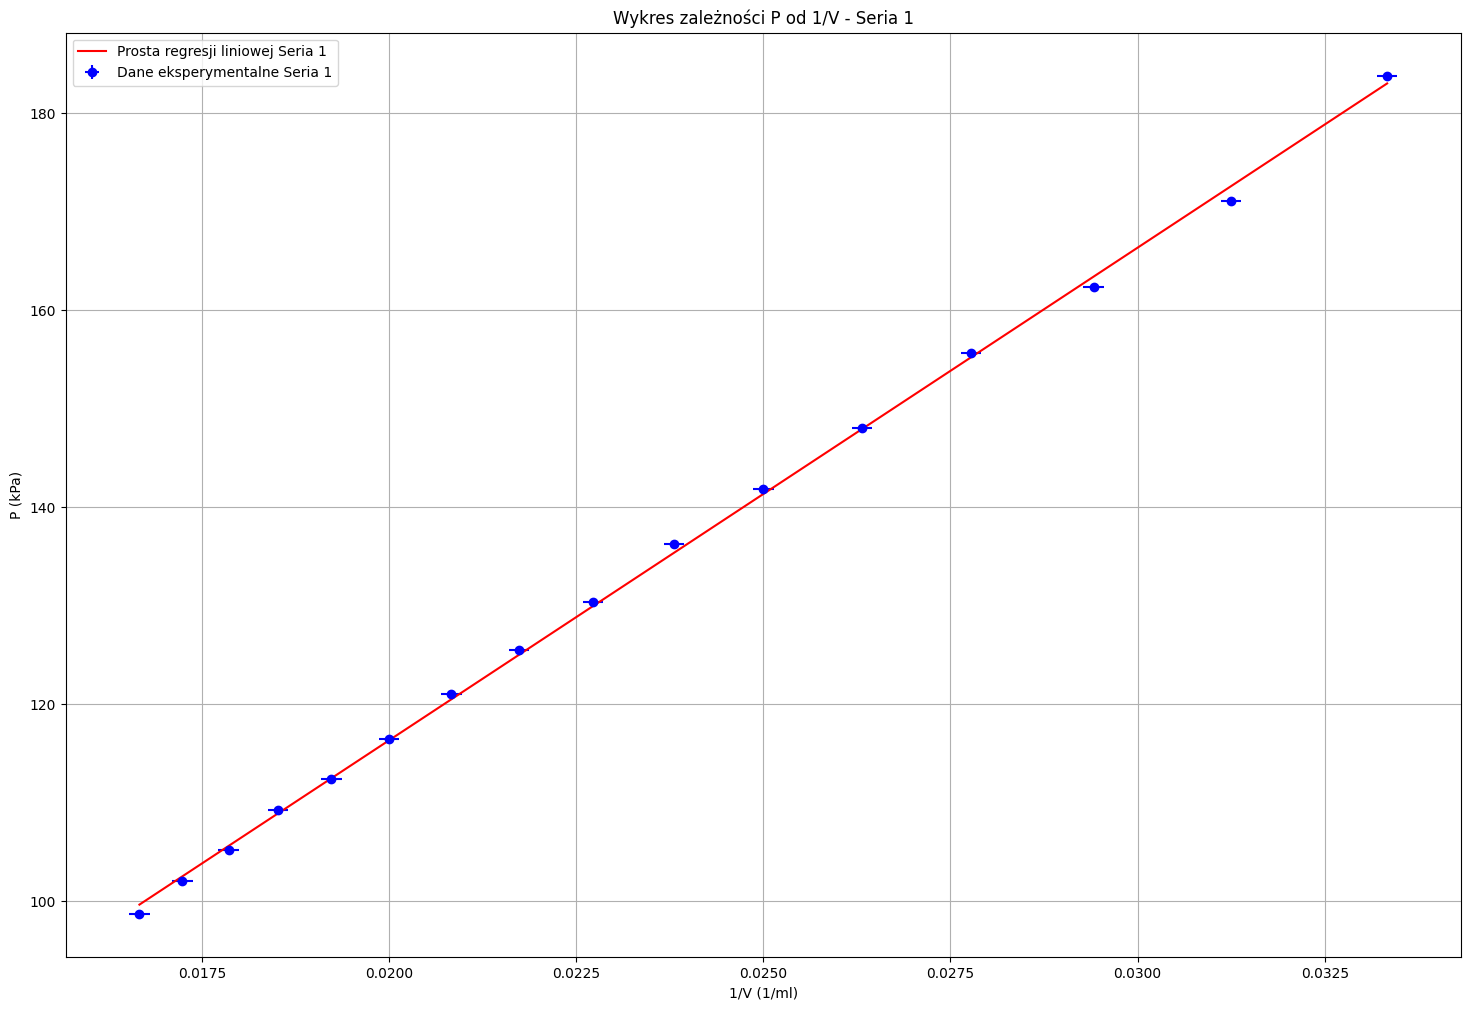

x: [0.01666667 0.01724138 0.01785714 0.01851852 0.01923077 0.02
 0.02083333 0.02173913 0.02272727 0.02380952 0.025      0.02631579
 0.02777778 0.02941176 0.03125    0.03333333]
y: [ 98.7 102.  105.2 109.2 112.4 116.4 121.  125.5 130.4 136.2 141.8 148.
 155.6 162.3 171.1 183.8]


In [7]:
plt.figure(figsize=(18, 12))
plt.errorbar(V_2_1_rec, P_2_1, color='blue', xerr=(0.5/np.sqrt(3))/(np.mean(V_2_1**2)), yerr=0.1, fmt='o', label='Dane eksperymentalne Seria 1')
plt.plot(V_2_1_rec, prosta_regresji_2_1(V_2_1_rec), color='red', label='Prosta regresji liniowej Seria 1')
plt.title('Wykres zależności P od 1/V - Seria 1')
plt.xlabel('1/V (1/ml)')
plt.ylabel('P (kPa)')
plt.legend()
plt.grid()
plt.show()

print(f"x: {V_2_1_rec}")
print(f"y: {P_2_1}")

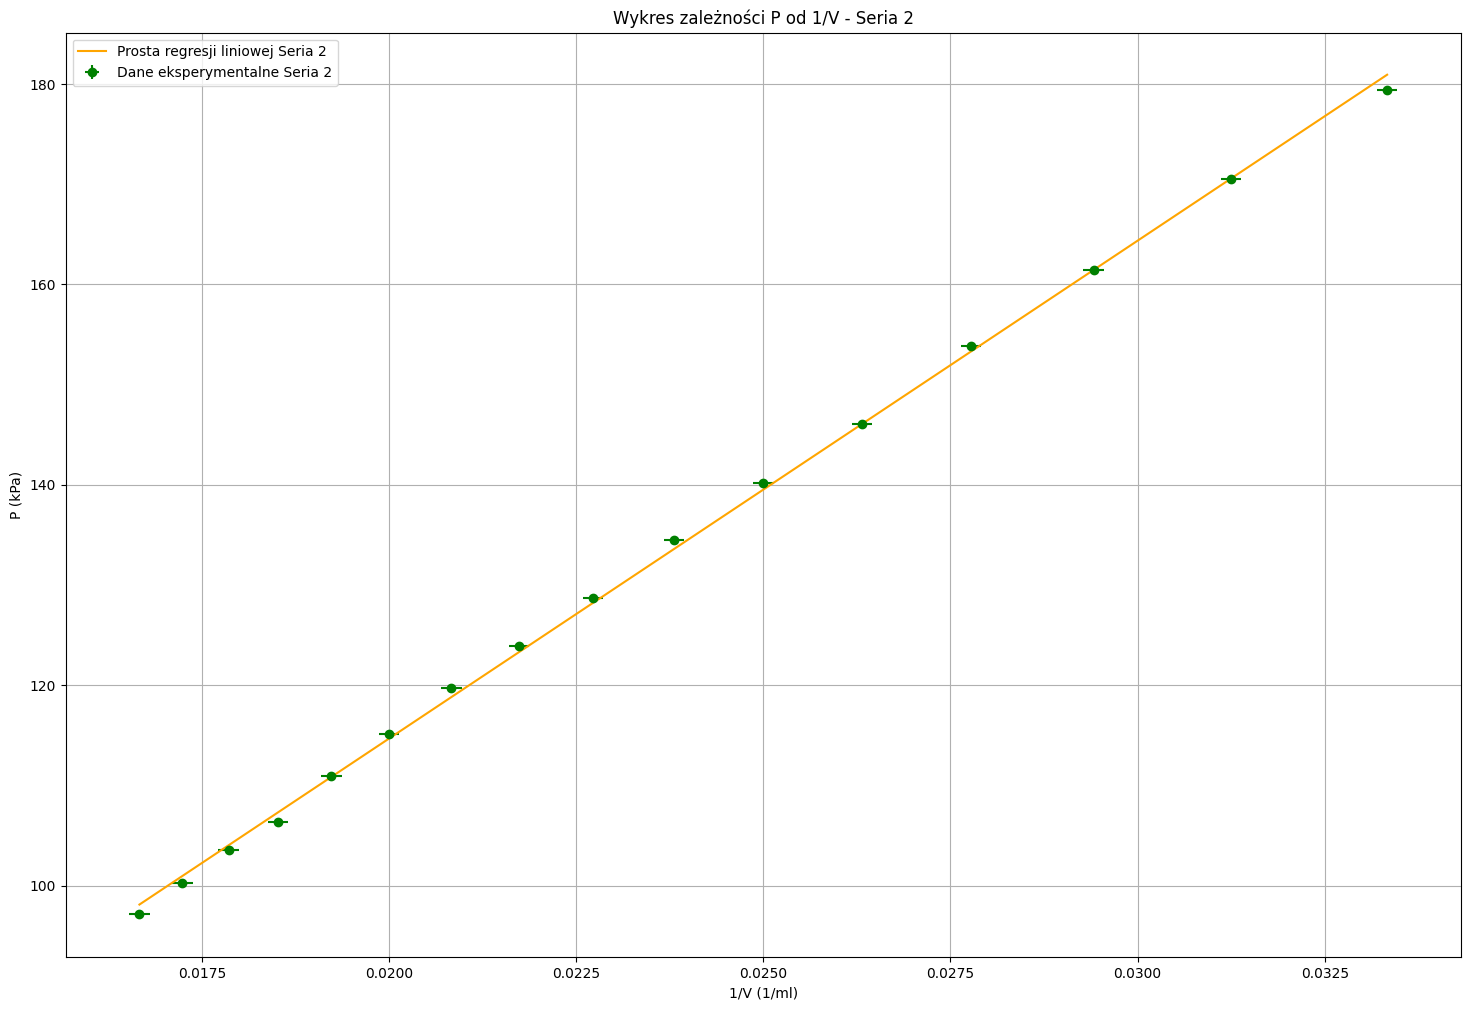

x: [0.01666667 0.01724138 0.01785714 0.01851852 0.01923077 0.02
 0.02083333 0.02173913 0.02272727 0.02380952 0.025      0.02631579
 0.02777778 0.02941176 0.03125    0.03333333]
y: [ 97.2 100.3 103.6 106.4 110.9 115.1 119.7 123.9 128.7 134.5 140.2 146.1
 153.9 161.4 170.5 179.4]


In [8]:
plt.figure(figsize=(18, 12))
plt.errorbar(V_2_2_rec, P_2_2, color='green', xerr=(0.5/np.sqrt(3))/(np.mean(V_2_2**2)), yerr=0.1, fmt='o', label='Dane eksperymentalne Seria 2')
plt.plot(V_2_2_rec, prosta_regresji_2_2(V_2_2_rec), color='orange', label='Prosta regresji liniowej Seria 2')
plt.title('Wykres zależności P od 1/V - Seria 2')
plt.xlabel('1/V (1/ml)')
plt.ylabel('P (kPa)')
plt.legend()
plt.grid()
plt.show()

print(f"x: {V_2_2_rec}")
print(f"y: {P_2_2}")

### Wykres dla danych uśrednionych

Regresja liniowa dla danych uśrednionych: p=4986.0340*(1/V) + 15.7706


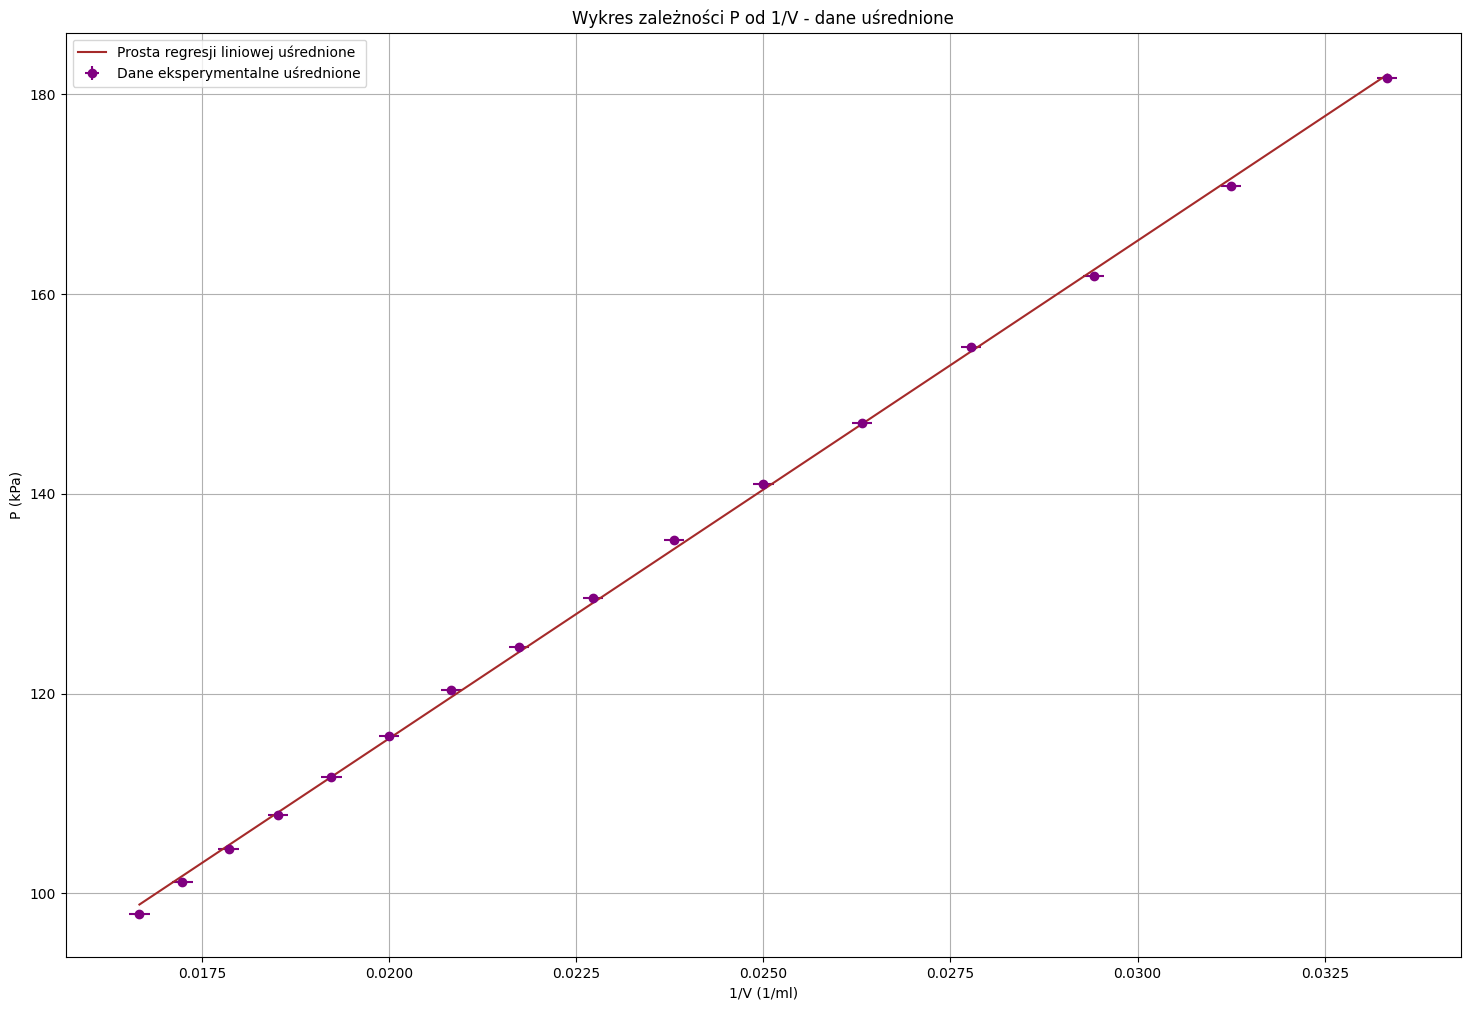

x: [0.01666667 0.01724138 0.01785714 0.01851852 0.01923077 0.02
 0.02083333 0.02173913 0.02272727 0.02380952 0.025      0.02631579
 0.02777778 0.02941176 0.03125    0.03333333]
y: [ 97.95 101.15 104.4  107.8  111.65 115.75 120.35 124.7  129.55 135.35
 141.   147.05 154.75 161.85 170.8  181.6 ]


In [6]:
V_2 = (V_2_1 + V_2_2) / 2  # [ml]
P_2 = (P_2_1 + P_2_2) / 2  # [kPa]
V_2_rec = 1 / V_2  # [1/ml]
wspolczynniki_2 = np.polyfit(V_2_rec, P_2, 1)
prosta_regresji_2 = np.poly1d(wspolczynniki_2)

print(f"Regresja liniowa dla danych uśrednionych: p={wspolczynniki_2[0]:.4f}*(1/V) + {wspolczynniki_2[1]:.4f}")

plt.figure(figsize=(18, 12))
plt.errorbar(V_2_rec, P_2, xerr=(0.5/np.sqrt(3))/(np.mean(V_2**2)), yerr=0.1, fmt='o', color='purple', label='Dane eksperymentalne uśrednione')
plt.plot(V_2_rec, prosta_regresji_2(V_2_rec), color='brown', label='Prosta regresji liniowej uśrednione')
plt.title('Wykres zależności P od 1/V - dane uśrednione')
plt.xlabel('1/V (1/ml)')
plt.ylabel('P (kPa)')
plt.legend()
plt.grid()
plt.show()

print(f"x: {V_2_rec}")
print(f"y: {P_2}")